# Movielens 1M

Informację nt. zbioru danych -> http://files.grouplens.org/datasets/movielens/ml-1m-README.txt

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
user_data = pd.read_csv('../ml-1m/users.dat', 
                    sep="::",
                    names=['user_id', 'sex', 'age_id', 'occupation_id', 'zip_code'],
                    engine='python'
                )
age = pd.read_csv('../ml-1m/age.dat', 
                    sep="::",
                    names=['age_id', 'age_group'],
                    engine='python'
                )
occupation = pd.read_csv('../ml-1m/occupation.dat', 
                    sep="::",
                    names=['occupation_id', 'occupation'],
                    engine='python'
                )
movies_data = pd.read_csv('../ml-1m/movies.dat', 
                    sep="::",
                    names=['movie_id', 'title', 'genres'],
                    engine='python'
                )
ratings_data = pd.read_csv('../ml-1m/ratings.dat', 
                    sep="::",
                    names=['user_id', 'movie_id', 'rating', 'timestamp'],
                    engine='python'
                )

In [4]:
users = pd.merge(user_data, age)
users = pd.merge(users, occupation)
users.head(3)

,user_id,sex,age_id,occupation_id,zip_code,age_group,occupation
0,1,F,1,10,48067,0-18,student
1,19,M,1,10,48073,0-18,student
2,51,F,1,10,10562,0-18,student


In [5]:
movie_ratings = pd.merge(movies_data, ratings_data)
movielens = pd.merge(users, movie_ratings)
movielens

,user_id,sex,age_id,occupation_id,zip_code,age_group,occupation,movie_id,title,genres,rating,timestamp
0,1,F,1,10,48067,0-18,student,1,Toy Story (1995),Animation|Children's|Comedy,5,978824268
1,1,F,1,10,48067,0-18,student,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5,978824351
2,1,F,1,10,48067,0-18,student,150,Apollo 13 (1995),Drama,5,978301777
3,1,F,1,10,48067,0-18,student,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4,978300760
4,1,F,1,10,48067,0-18,student,527,Schindler's List (1993),Drama|War,5,978824195
5,1,F,1,10,48067,0-18,student,531,"Secret Garden, The (1993)",Children's|Drama,4,978302149
6,1,F,1,10,48067,0-18,student,588,Aladdin (1992),Animation|Children's|Comedy|Musical,4,978824268
7,1,F,1,10,48067,0-18,student,594,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,4,978302268
8,1,F,1,10,48067,0-18,student,595,Beauty and the Beast (1991),Animation|Children's|Musical,5,978824268
9,1,F,1,10,48067,0-18,student,608,Fargo (1996),Crime|Drama|Thriller,4,978301398


## Podstawowe metryki

In [14]:
len(movies_data) # ilość filmów

3883

In [12]:
len(user_data) ## ilośc userów

6040

In [13]:
len(ratings_data) ## ilośc ocen

1000209

## Sprawdzenie szumów

In [37]:
movies_data.groupby('title').size().sort_values(ascending=False)[:2]

title
eXistenZ (1999)        1
Forrest Gump (1994)    1
dtype: int64

In [40]:
user_data.groupby('user_id').size().sort_values(ascending=False)[:2]

user_id
6040    1
2017    1
dtype: int64

In [15]:
movielens.groupby(['user_id', 'movie_id']).size().sort_values(ascending=False)[:2]

user_id  movie_id
6040     3819        1
1968     1672        1
dtype: int64

### Jak widać w zbiorze danych nie występują szumy w postaci zduplikowanych filmów, użytkowników, czy też ocen przyznanych przez użytkowników do danego filmu

## Analiza danych użytkowników

college/grad student    759
other                   711
executive/managerial    679
academic/educator       528
technician/engineer     502
programmer              388
sales/marketing         302
writer                  281
artist                  267
self-employed           241
doctor/health care      236
student                 195
clerical/admin          173
scientist               144
retired                 142
lawyer                  129
customer service        112
homemaker                92
unemployed               72
tradesman/craftsman      70
farmer                   17
Name: occupation, dtype: int64


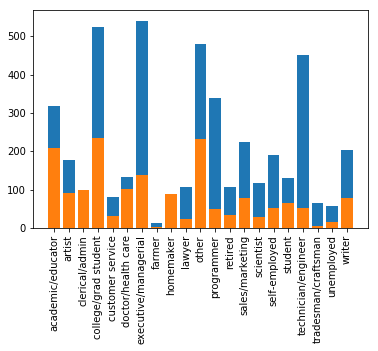

In [6]:
occcupations = users.occupation.value_counts()
print(occcupations)

x = range(len(occcupations))

occupation_by_gender = users.groupby(['sex', 'occupation']).size()

ax = plt.subplot(111)
ax.bar(x, occupation_by_gender['M'])
ax.bar(x, occupation_by_gender['F'])
ax.set_xticks(x)
ax.set_xticklabels(occupation_by_gender['M'].keys(), rotation=90)
plt.show()

In [43]:
age_bins = users.age_group.value_counts()

([<matplotlib.axis.XTick at 0x7ffb7bd0eac8>,
 <a list of 7 Text xticklabel objects>)

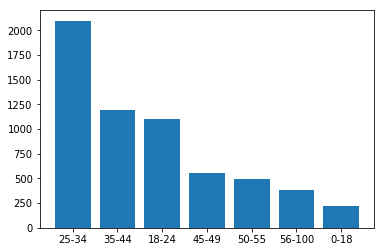

In [61]:
x = range(len(age_bins))

plt.bar(x, age_bins)
plt.xticks(x, age_bins.keys())

In [66]:
users.sex.value_counts()

M    4331
F    1709
Name: sex, dtype: int64

## Analiza danych o ocenach filmów

rating
1     56174
2    107557
3    261197
4    348971
5    226310
dtype: int64


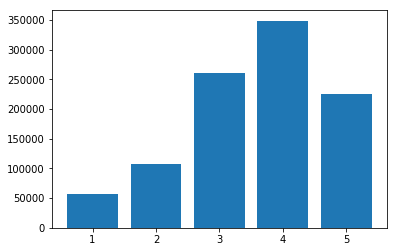

In [75]:
grouped_ratings = movielens.groupby('rating').size()
print(grouped_ratings)

x = range(len(grouped_ratings))

plt.bar(x, grouped_ratings)
plt.xticks(x, grouped_ratings.keys())
plt.show()

### 25 najczęściej ocenianych filmów

In [67]:
movielens.title.value_counts()[:25]

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Princess

### 25 najlepiej ocenianych filmów

In [55]:
movie_ratings = movielens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_ratings.sort_values([('rating', 'size')])
at_least_100_ratings = movie_ratings['rating']['size'] >= 100
movie_ratings[at_least_100_ratings].sort_values([('rating', 'mean')], ascending=False)[:25]

rating          
                                                     size      mean
title                                                              
Seven Samurai (The Magnificent Seven) (Shichini...    628  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                2223  4.524966
Close Shave, A (1995)                                 657  4.520548
Usual Suspects, The (1995)                           1783  4.517106
Schindler's List (1993)                              2304  4.510417
Wrong Trousers, The (1993)                            882  4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)         470  4.491489
Raiders of the Lost Ark (1981)                       2514  4.477725
Rear Window (1954)                                   1050  4.476190
Paths of Glory (1957)                                 230  4.473913
Star Wars: Episode IV - A New Hope (1977)            2991  4.453694
Third Man, The (1949)                                 480  4.452083
Dr. Strangelove or: How I Learned to Stop Worry...   1367  4.449890
Wallace & Gromit: The Best of Aardman Animation...    438  4.426941
To Kill a Mockingbird (1962)                          928  4.425647
Double Indemnity (1944)                               551  4.415608
Casablanca (1942)                                    1669  4.412822
Sixth Sense, The (1999)                              2459  4.406263
Yojimbo (1961)                                        215  4.404651
Lawrence of Arabia (1962)                             831  4.401925
Maltese Falcon, The (1941)                           1043  4.395973
One Flew Over the Cuckoo's Nest (1975)               1725  4.390725
Citizen Kane (1941)                                  1116  4.388889
City Lights (1931)                                    271  4.387454

### Średnia ocen dla danej grupy wiekowej

In [69]:
movielens.rating.mean()

3.5815644530293169

In [70]:
movielens.groupby('age_group').agg({'rating': [np.mean]})

,rating
,mean
age_group,
0-18,3.549520
18-24,3.507573
25-34,3.545235
35-44,3.618162
45-49,3.638062
50-55,3.714512
56-100,3.766632


In [71]:
movielens.set_index('movie_id', inplace=True)

In [72]:
most_50 = movielens.groupby('movie_id').size().sort_values(ascending=False)[:50]
by_age = movielens.loc[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(14)

title                         age_group
2001: A Space Odyssey (1968)  0-18         4.150000
                              18-24        3.923404
                              25-34        4.024712
                              35-44        4.080940
                              45-49        4.168478
                              50-55        4.241379
                              56-100       4.118280
Abyss, The (1989)             0-18         3.909091
                              18-24        3.893939
                              25-34        3.614509
                              35-44        3.686217
                              45-49        3.683099
                              50-55        3.513514
                              56-100       3.509091
Name: rating, dtype: float64

In [73]:
by_age.rating.mean().unstack(1).fillna(0)[10:20]

age_group,0-18,18-24,25-34,35-44,45-49,50-55,56-100
title,,,,,,,
Braveheart (1995),4.192982,4.406250,4.254292,4.152318,4.119048,4.099476,3.969388
"Bug's Life, A (1998)",3.587500,3.820163,3.954338,3.843931,3.707965,3.804598,3.716981
E.T. the Extra-Terrestrial (1982),3.653333,3.801527,3.957111,4.004202,4.085427,4.188312,4.174419
Fargo (1996),4.283019,4.175166,4.235650,4.234694,4.315789,4.396985,4.440678
Forrest Gump (1994),4.168539,4.100897,4.054678,4.036939,4.187166,4.090909,4.228571
"Fugitive, The (1993)",4.163265,4.017766,4.119904,4.136000,4.121429,4.144928,4.046154
Galaxy Quest (1999),3.739130,3.656357,3.764253,3.830380,3.760736,3.901961,3.864407
Ghostbusters (1984),3.881356,4.020179,3.894490,3.838407,3.966292,3.841727,3.734177
Gladiator (2000),4.203390,4.231441,4.084291,3.981651,4.132231,4.163636,3.878788


### Różnice między płciami

In [74]:
movielens.reset_index('movie_id', inplace=True)

In [75]:
pivoted = movielens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)

In [76]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),4.187817,4.130552,-0.057265
2,Jumanji (1995),3.278409,3.175238,-0.103171
3,Grumpier Old Men (1995),3.073529,2.994152,-0.079377
4,Waiting to Exhale (1995),2.976471,2.482353,-0.494118
5,Father of the Bride Part II (1995),3.212963,2.888298,-0.324665


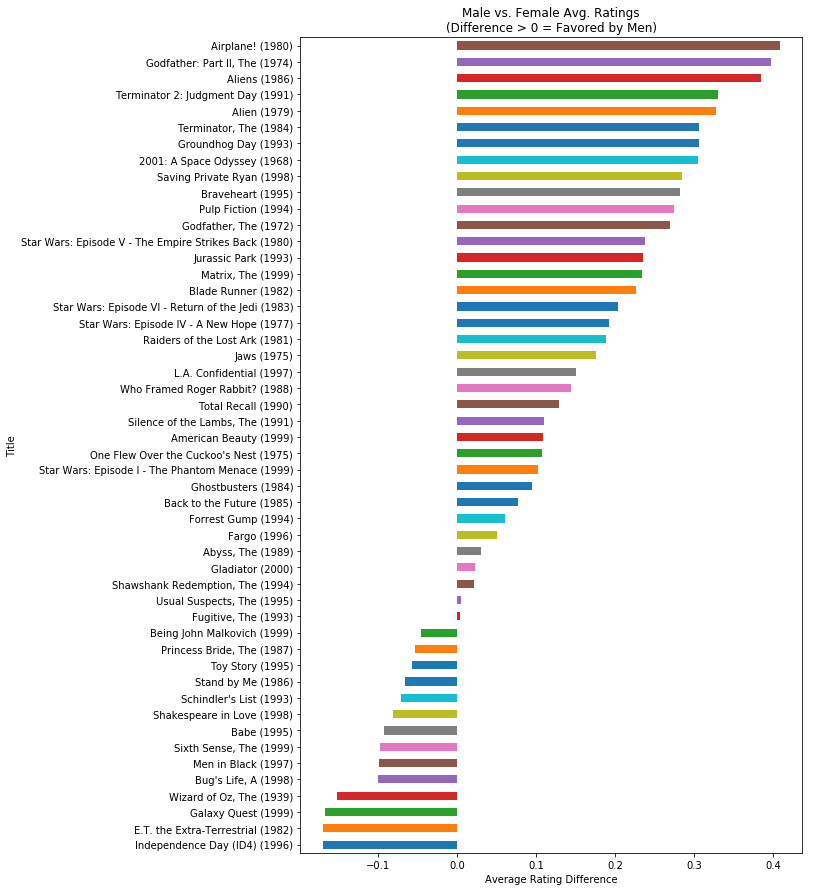

In [77]:
pivoted.reset_index('movie_id', inplace=True)
disagreements = pivoted[pivoted.movie_id.isin(most_50.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');
plt.show()